# Lesson 03: From Clustering To Classification

## k-nearest neighbor clustering
Recap the kmeans clustering result:
![by Weston.pace, from commons.wikimedia.org under CC-BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/278px-K_Means_Example_Step_4.svg.png)

- in this case, we have $k=3$ clusters and hence have produced a dataset of form  
$ \mathcal{D}_{k=3} = \{ \langle \vec{x}_{1}, f(\vec{x}_{1}) \rangle, \dots \} $ 
  + where $f$ denotes a class label of a cluster, e.g. if $\vec{x}_{1}$ belongs to cluster $2$, then $f(\vec{x}_{1}) = 2$
  + in other words $f(\vec{x}_{1})$ represents the mathematical mapping that our `kmeans` applies to our dataset
  

## going for classification

- to use this for classification, we want to start from a fully labelled dataset
- given an unseen query point $\vec{x}_{q}$, we would like to know what cluster it belongs to

![by Sebastian Raschka, Stat 451: intro to ML](https://raw.githubusercontent.com/deeplearning540/lesson03/main/images/raschka_knn_p28.png)


- there are multiple options how to decide to which class the query point belongs to
![by Sebastian Raschka, Stat 451: intro to ML](https://raw.githubusercontent.com/deeplearning540/lesson03/main/images/raschka_knn_p29.png)

- **note** that the choice of $k$ determines the radius in this image above, here $k=5$ was set


- the plurality vote is mathematically known as the **mode** of a distribution of discrete numbers, i.e. the category with highest frequency wins

![by Sebastian Raschka, Stat 451: intro to ML](https://raw.githubusercontent.com/deeplearning540/lesson03/main/images/raschka_knn_p30.png)

- important: what hyper parameters govern the decision boundary?
  + the choice of distance metric, e.g. euclidean distance
  + the number of neighbors to consider, i.e. $k$
  

# Using kNN classification


## Data

For the following, I will rely (again) on the Palmer penguin dataset obtained from [this repo](https://github.com/allisonhorst/palmerpenguins). To quote the repo:

> Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
> and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).


In [ ]:
import pandas as pd
print("pandas version:", pd.__version__)


pandas version: 1.3.5


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
#let's remove the rows with NaN values
df = df[ df.bill_length_mm.notnull() ]

#convert species column to 
df[["species_"]] = df[["species"]].astype("category")

print(df.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year species_  
0       3750.0    male  2007   Adelie  
1       3800.0  female  2007   Adelie  
2       3250.0  female  2007   Adelie  
4       3450.0  female  2007   Adelie  
5       3650.0    male  2007   Adelie  


In [ ]:
print("species_ encoding:")
print("\n".join([ str(item)+" : "+df.species_.cat.categories[item] for item in range(len(df.species_.cat.categories)) ]))

species_ encoding:
0 : Adelie
1 : Chinstrap
2 : Gentoo


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("seaborn version :", sns.__version__)

seaborn version : 0.11.2


In [ ]:
import numpy as np
X = np.stack((df.bill_length_mm, df.flipper_length_mm), axis=-1)
y=df.species_.cat.codes

print(X.shape, y.shape)

(342, 2) (342,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split

Knn = knn(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=20222204)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape, y_test.shape)


(307, 2)
(307,)
(35, 2) (35,)


In [ ]:
Knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
x0_test = X_test[0].reshape(1,2)
y0_test_hat = Knn.predict(x0_test)

print(f"preidcted label : {y0_test_hat} , true label {y_test.values[0]} ")

preidcted label : [0] , true label 0 


In [ ]:
y_test_hat = Knn.predict(X_test)

n_correct = (y_test_hat == y_test.values).sum()

print(f"{n_correct} out of {y_test.size} is correctly predicted ")

32 out of 35 is correctly predicted 


# Further Reading

- some parts of this material were inspired by [Sebastian Raschka](https://sebastianraschka.com)
  + confusion matrix [lesson 12.1](https://www.youtube.com/watch?v=07dtryhNGms)
  + precision, recall and F1 score [lesson 12.2](https://youtu.be/yEw9oDdJkT0)
  
- a generally good resource 
  + [Confusion_matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
  + [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)
  
- all of the above is nicely implemented and [documented](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

##Evaluating the classification

In [ ]:
binary_test_hat = (y_test_hat < 1).astype(np.int8)
binary_test = (y_test.values < 1).astype(np.int8)

print(binary_test_hat)
print(binary_test)

[1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(binary_test, binary_test_hat)
print(cm)

[[16  2]
 [ 1 16]]


In [ ]:
tn = cm[0,0]
tp = cm[1,1]
fn= cm[1,0]
fp = cm[0,1]

In [ ]:
manual_tp = np.logical_and(binary_test == 1, binary_test_hat == 1).sum()
assert manual_tp == tp

In [ ]:
manual_fp = np.logical_and(binary_test == 0, binary_test_hat == 1).sum()
assert manual_fp == fp

In [ ]:
manual_fn = np.logical_and(binary_test == 1, binary_test_hat == 0).sum()
assert manual_fn == fn

In [ ]:
manual_tn = np.logical_and(binary_test == 0, binary_test_hat == 0).sum()
assert manual_tn == tn

![confusion](https://raw.githubusercontent.com/deeplearning540/lesson03/main/images/viz-confusion-matrix.png)

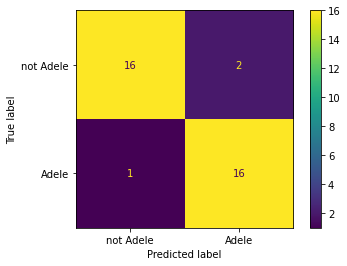

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

dip = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not Adele', 'Adele'])
dip.plot()

##Accuracy

In [ ]:
total = float(cm.sum())
acc = (tp+tn)/total

print("accuracy :", acc)

accuracy : 0.9142857142857143


## recall ( known as the postive rate)

How many of the true class samples, do I get right with  the prediction?

In [ ]:
cond_true = tp+ fn
exp_recall = tp/cond_true

print(f"our Knn algorithm produce a test recall of {exp_recall} ")

our Knn algorithm produce a test recall of 0.9411764705882353 


In [ ]:
from sklearn.metrics import recall_score

obs_recall = recall_score(binary_test, binary_test_hat)

assert exp_recall == obs_recall

## Precision

from all I predicted positive, how many I correctly predicted

In [ ]:
pred_pos = tp + fp

precision = tp/pred_pos

print(f'our algorithm procued a test of precision {precision} ')

pur algorithm procued a test of precision 0.8888888888888888 


## F1 score
$F_1 = 2\cdot\frac{PRE \cdot REC}{PRE+REC}$

In [ ]:
f1 = 2*precision*exp_recall/(precision + exp_recall)

print(f"our Knn algorithm procued a test f1 of {f1} ")

our Knn algorithm procued a test f1 of 0.9142857142857143 
